In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from PIL import Image
from SVM import *

In [2]:
data = scipy.io.loadmat('dataset/ex6data1.mat')

In [3]:
X = data['X']
y = data['y'].flatten()

In [4]:
#Visualizing data

def plotdata(X, y):
    neg = y == 0
    pos = y == 1
    plt.plot(X[pos,0], X[pos,1], 'kx', label = 'Positive')
    plt.plot(X[neg,0], X[neg,1], 'yo', label = 'Negative')
    plt.show()

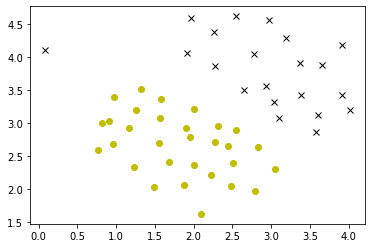

In [5]:
plotdata(X, y)

In [6]:
SVM =SVM()

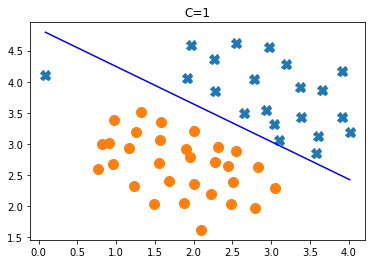

In [11]:
#Choosing C = 1

C =1
model = SVM.svmTrain(X, y, C,SVM.linearKernel)
SVM.visualizeBoundaryLinear(X, y, model,'C={}'.format(C))

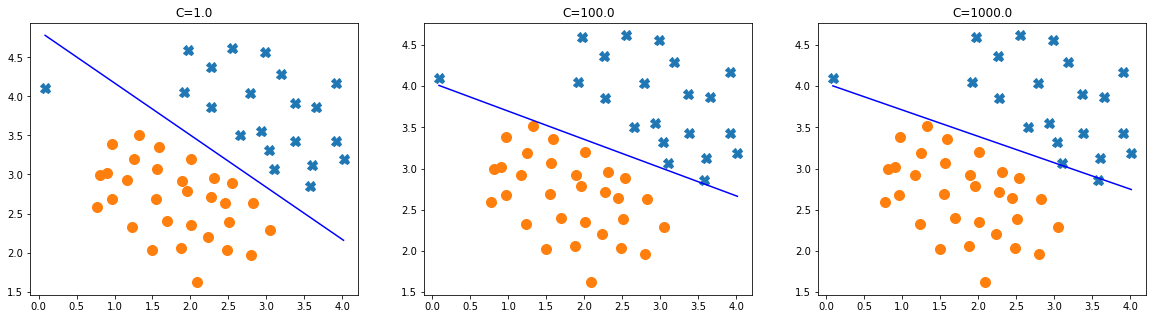

In [13]:
#Iterating the value of C

cals = [1.0,100.0,1000.0]
plt.figure(figsize=(20, 5))
for i, c in enumerate(cals):
    model = SVM.svmTrain(X, y, c, SVM.linearKernel)
    plt.subplot(1, 3, i+1)
    SVM.visualizeBoundaryLinear(X, y, model, 'C={}'.format(c))

In [14]:
#Gaussian Kernel

def gaussianKernel(x1, x2, sigma):
    sim = np.exp(-1 *((np.sum((x1-x2)**2))/(2*(sigma**2))))
    return sim

In [16]:
x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2
gaussianKernel(x1, x2, sigma)

0.32465246735834974

In [17]:
#Applying GaussianKernals in a data set

dt = scipy.io.loadmat('dataset/ex6data2.mat')
X, y = dt['X'], dt['y'][:,0]

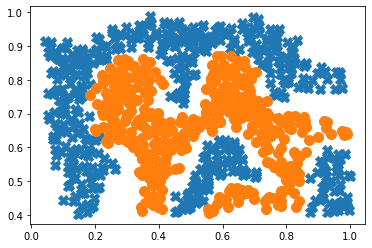

In [18]:
SVM.plotdata(X, y)

C:\Users\Hapi\Desktop\Deep_learning_with_python\MachineLearning-Tutorial\Machine-Learning-Coursera-With-Python\SVM\SVM.py:230: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1, X2, vals, cmap='YlGnBu', alpha=0.25, edgecolors='None', lw=0)


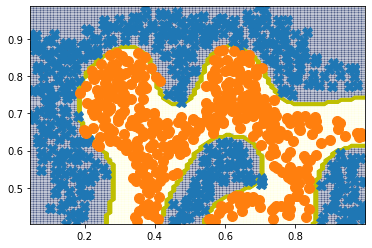

In [20]:
C = 1
sigma = 0.1
model = SVM.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
SVM.visualizeBoundary(X, y, model)

In [23]:
dt1 = scipy.io.loadmat('dataset/ex6data3.mat')
X, y = dt1['X'], dt1['y'][:, 0]
Xval, yval = dt1['Xval'], dt1['yval'][:,0]

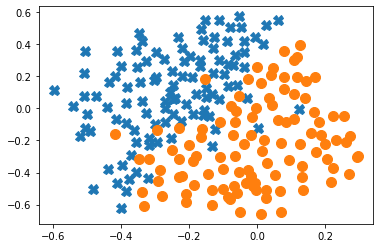

In [24]:
SVM.plotdata(X, y)

In [25]:
#Choosing optimal value of C and Sigma

def find_best_c_sigma(X, y, Xval, yval):
    
    C_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    error = 9999
    
    
    C = 0.01
    sigma = 0.01
    for c in C_vals:
        for s in sigma_vals:
            model = SVM.svmTrain(X, y, c, gaussianKernel, args=(s,))
            y_pred = SVM.svmPredict(model, Xval)
            error_mean = np.mean(y_pred != yval)
            if error_mean < error:
                C = c
                sigma = s
                error = error_mean
                
    return C, sigma

In [26]:
C, sigma = find_best_c_sigma(X, y, Xval, yval)

In [27]:
C

0.3

In [28]:
sigma

0.1

In [29]:
model = SVM.svmTrain(X, y, C, gaussianKernel, args=(sigma,))

C:\Users\Hapi\Desktop\Deep_learning_with_python\MachineLearning-Tutorial\Machine-Learning-Coursera-With-Python\SVM\SVM.py:230: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X1, X2, vals, cmap='YlGnBu', alpha=0.25, edgecolors='None', lw=0)


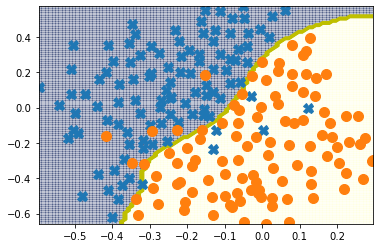

In [30]:
SVM.visualizeBoundary(X, y, model)